# Breast Cancer Diagnosis 

In [25]:
# importing package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import copy
import math
from utils import *
%matplotlib inline

### Objective:
    -- Understand the Dataset & cleanup (if required).
    -- Build classification models to predict whether the cancer type is Malignant or Benign.
    -- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [2]:
df = pd.read_csv("data/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 32)

In [5]:
df['diagnosed'] = (df['diagnosis'] == 'M').astype(int)

In [6]:
data = df.drop(columns = ['id', 'diagnosis', 'diagnosed'], axis = '1')

In [7]:
data_y = df['diagnosed']

In [8]:
x_train = data.values
y_train = data_y.values

In [9]:
## checking the dimensions of x_train and y_train

print("The shape of x_train:- " + str(x_train.shape))
print("The shape of y_train:- " + str(y_train.shape))

The shape of x_train:- (569, 30)
The shape of y_train:- (569,)


In [12]:
## printing first three elements:- 
# Assuming data is your DataFrame
x_features = data.columns
print("The first three elements of x_train:- ", x_train[:3])
print("The first three elements of y_train:- ", y_train[:3])

The first three elements of x_train:-  [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]
The first three elements of

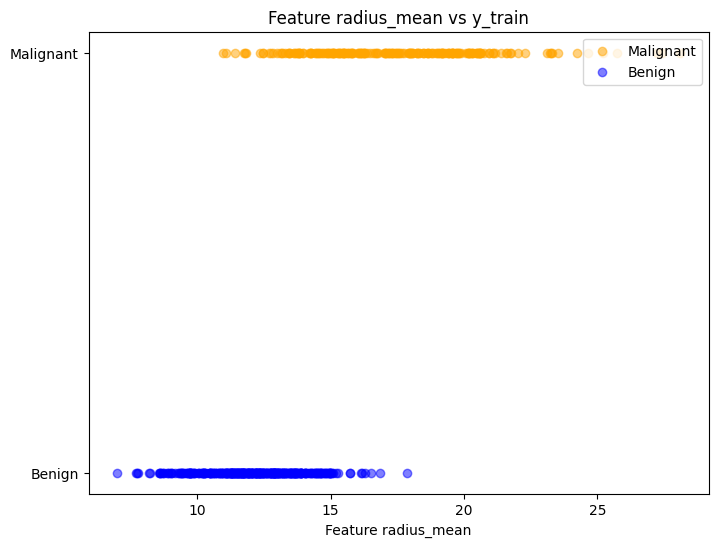

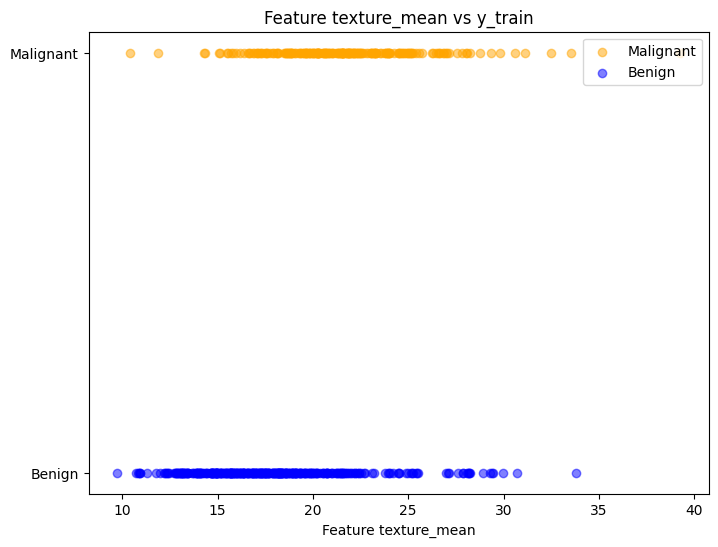

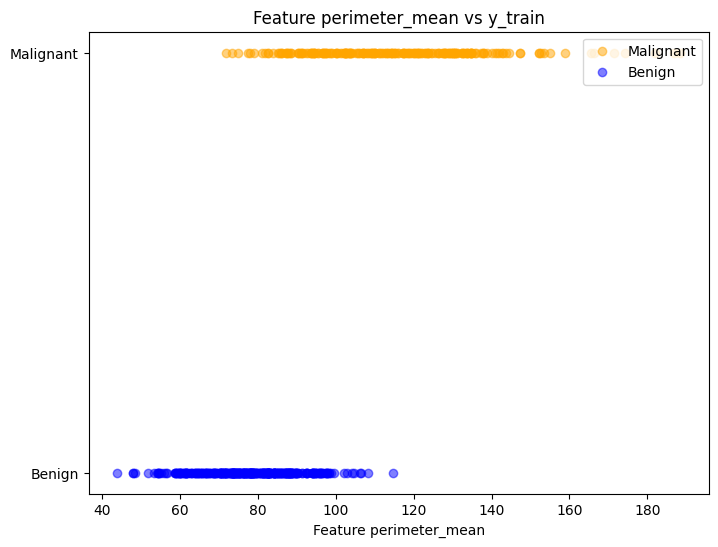

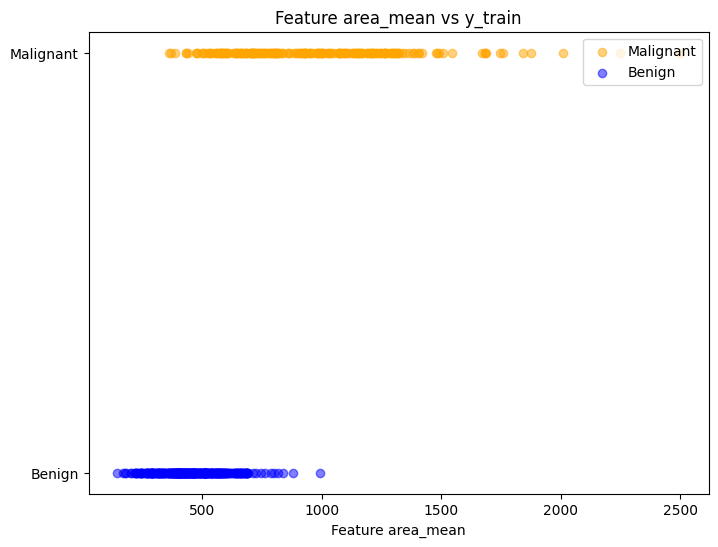

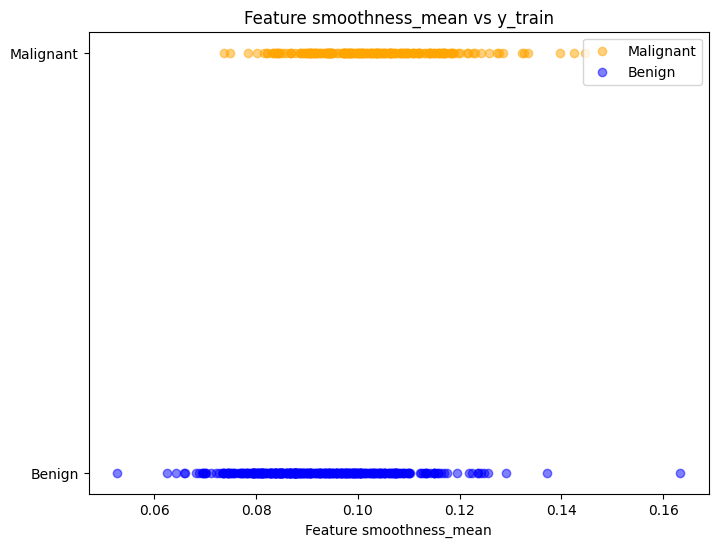

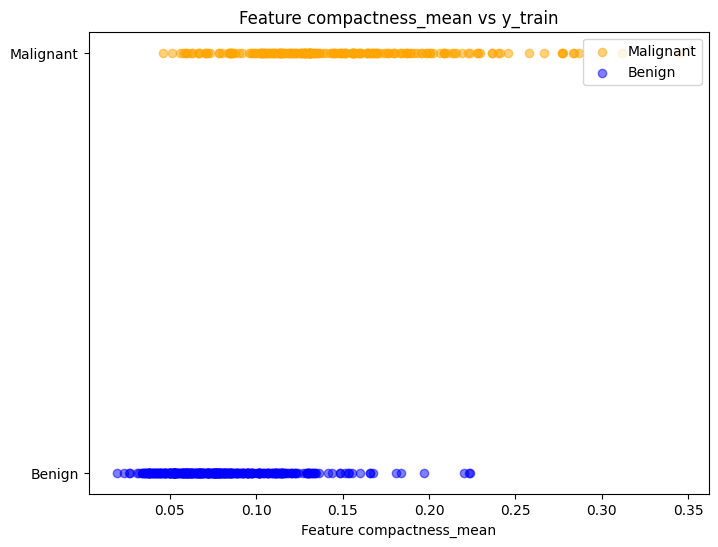

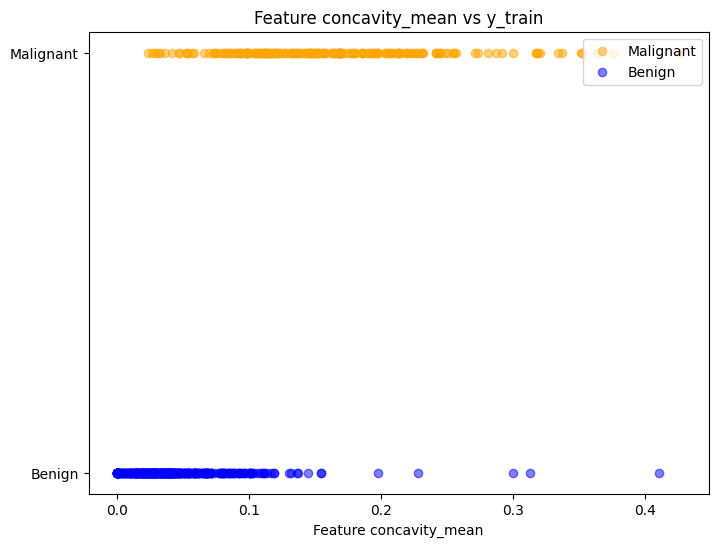

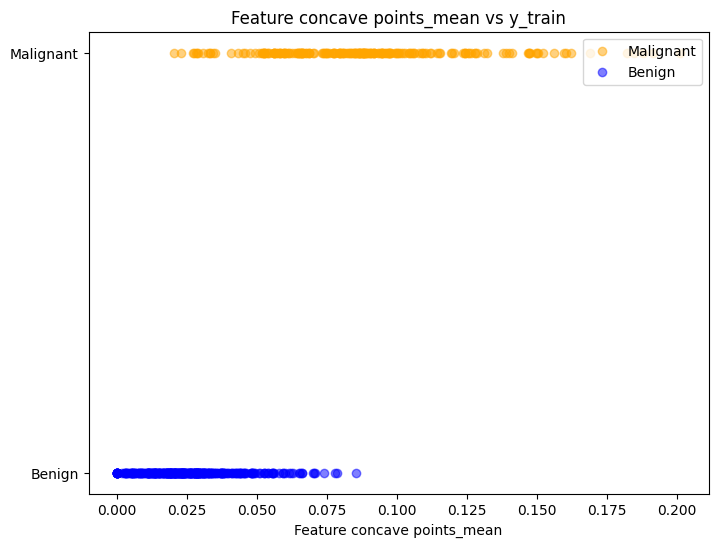

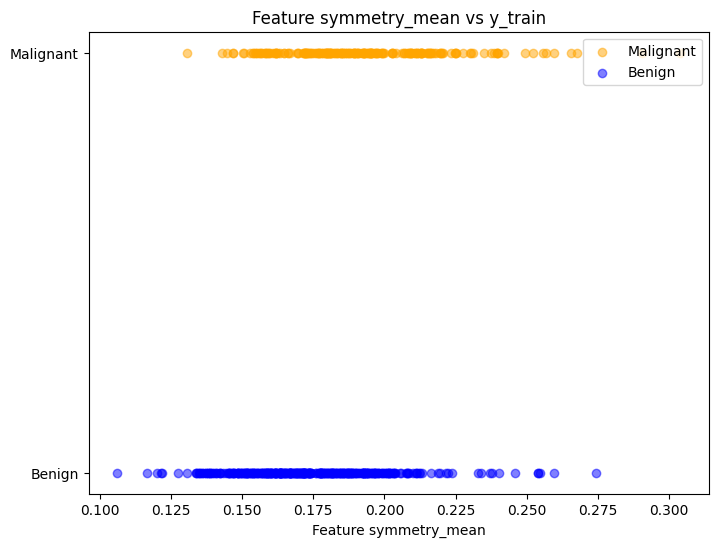

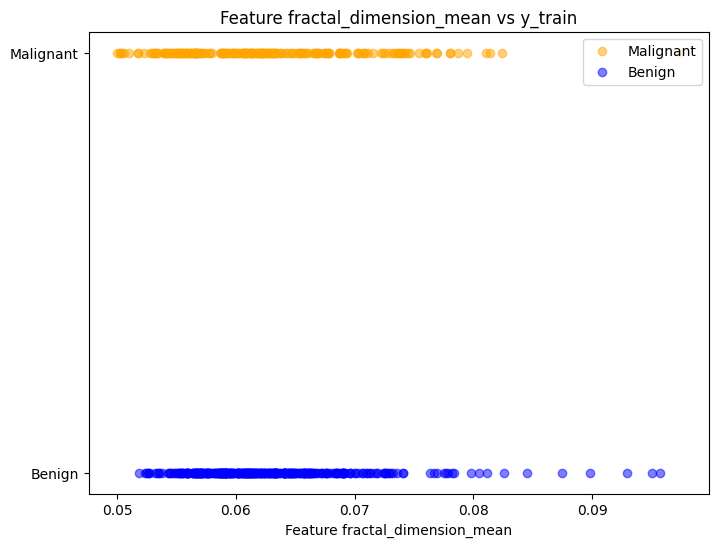

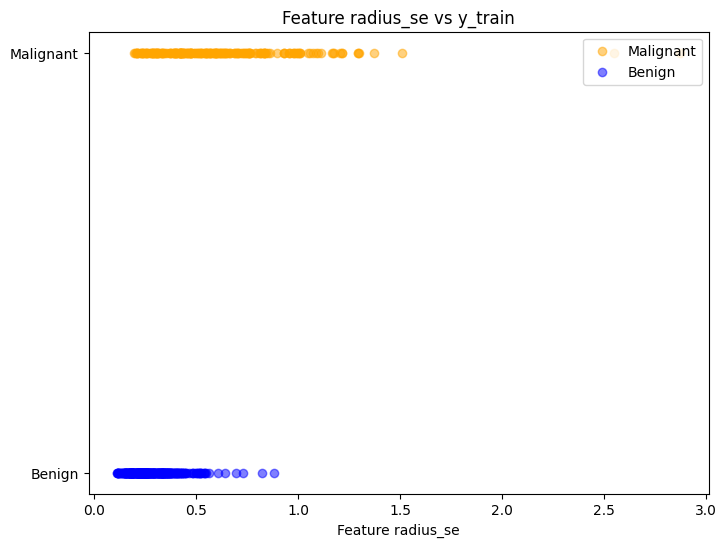

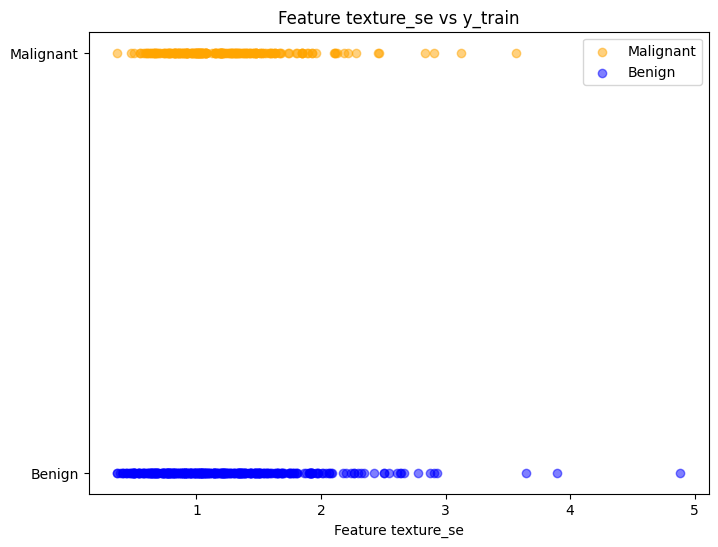

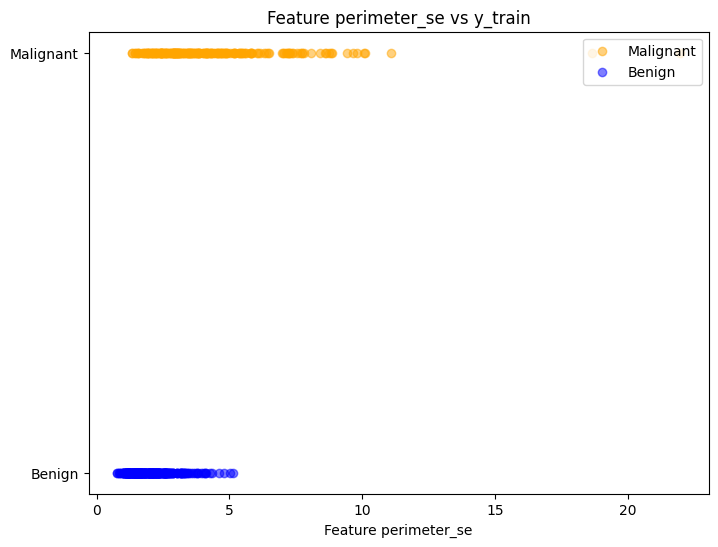

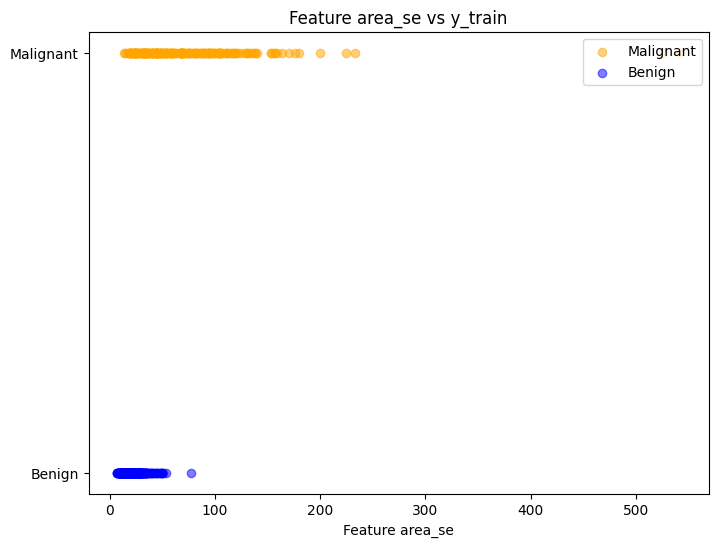

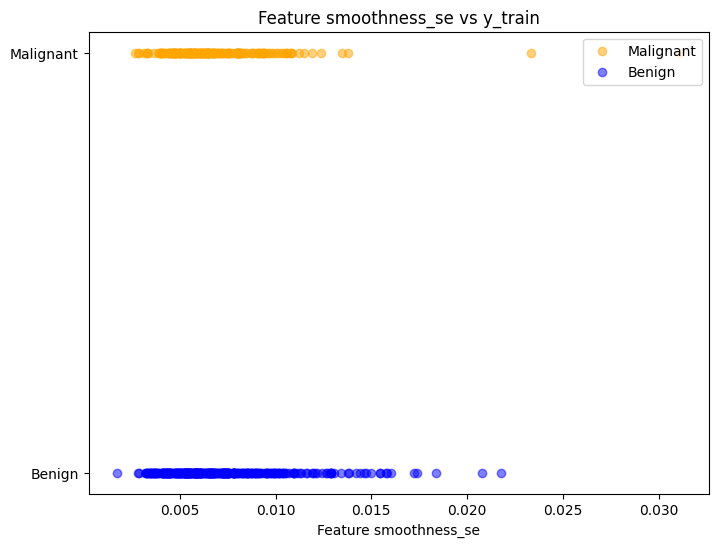

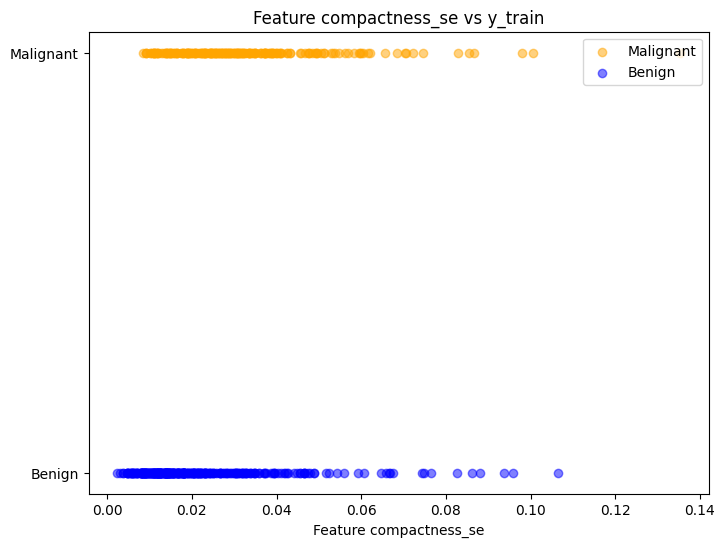

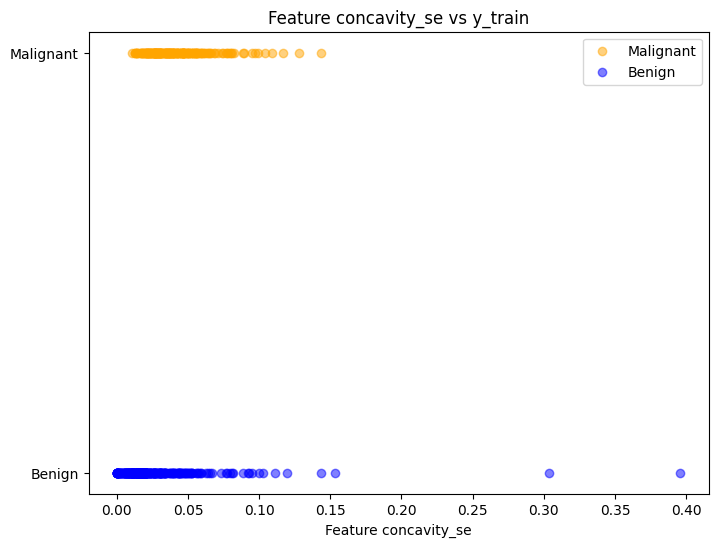

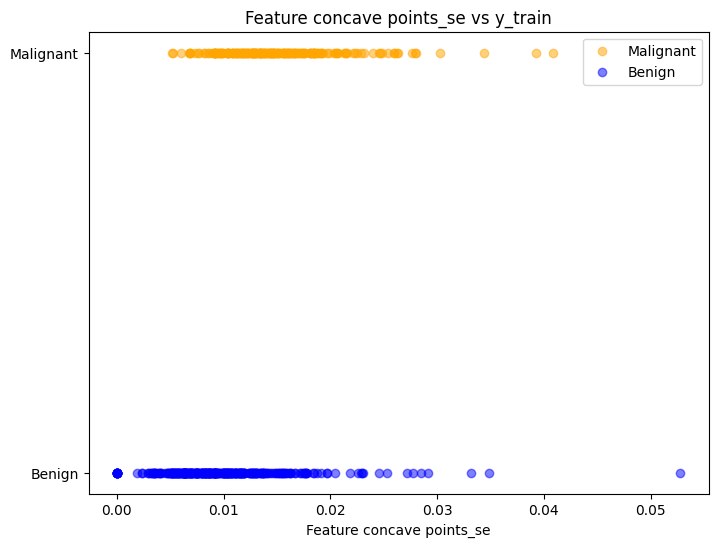

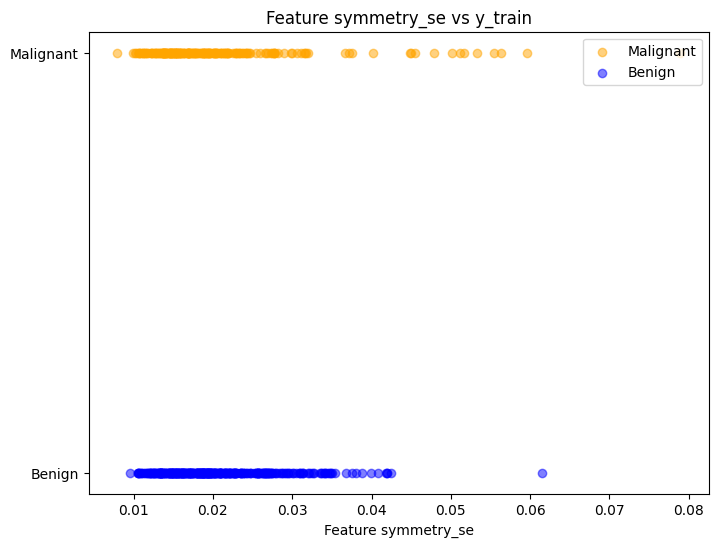

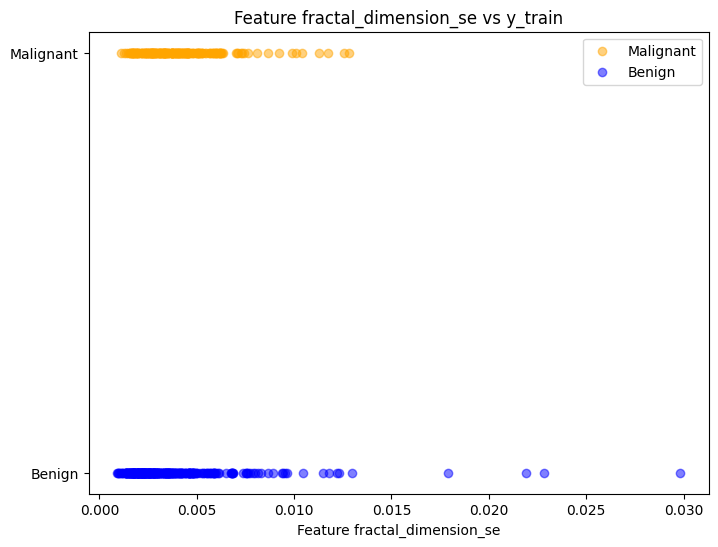

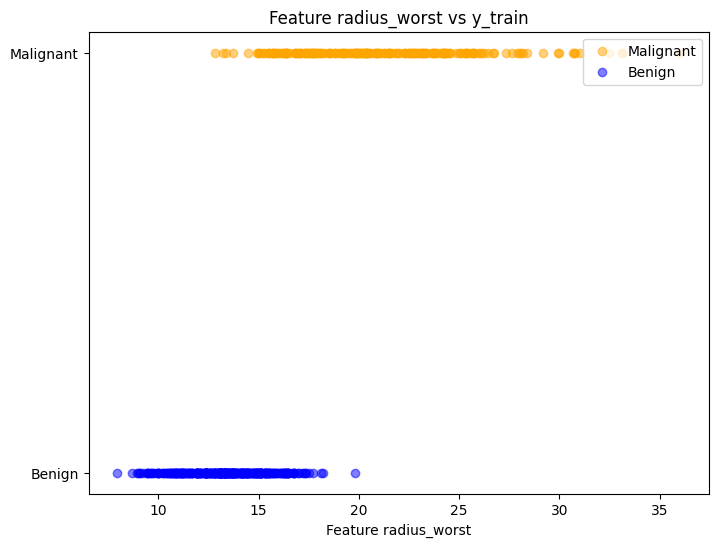

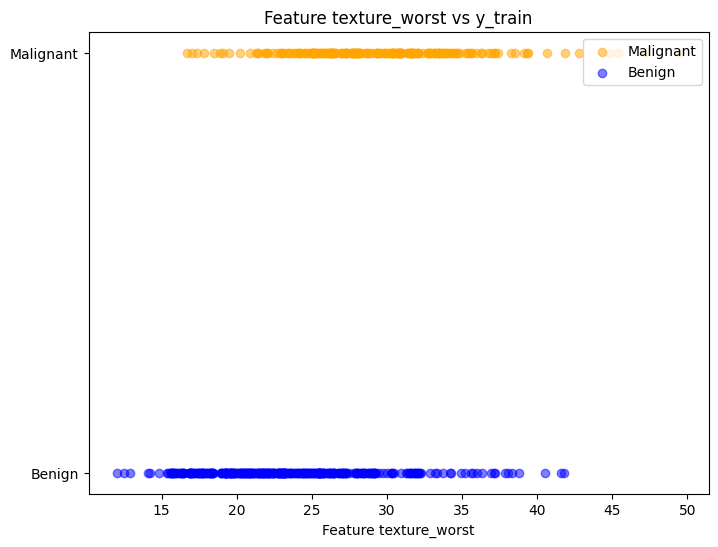

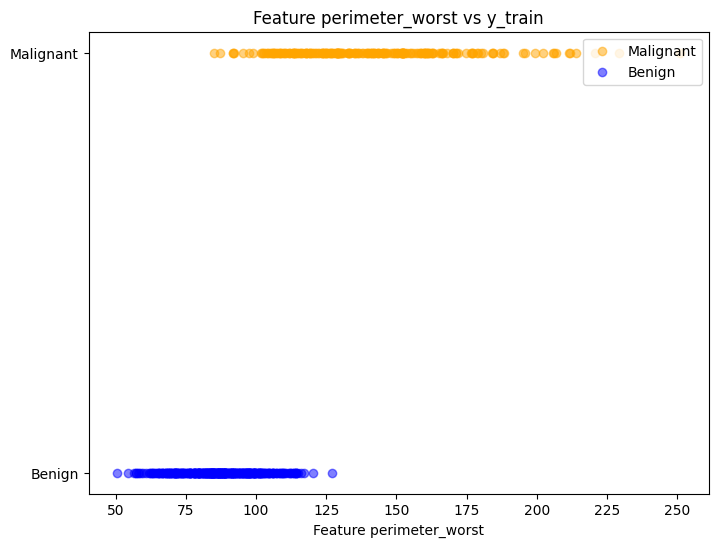

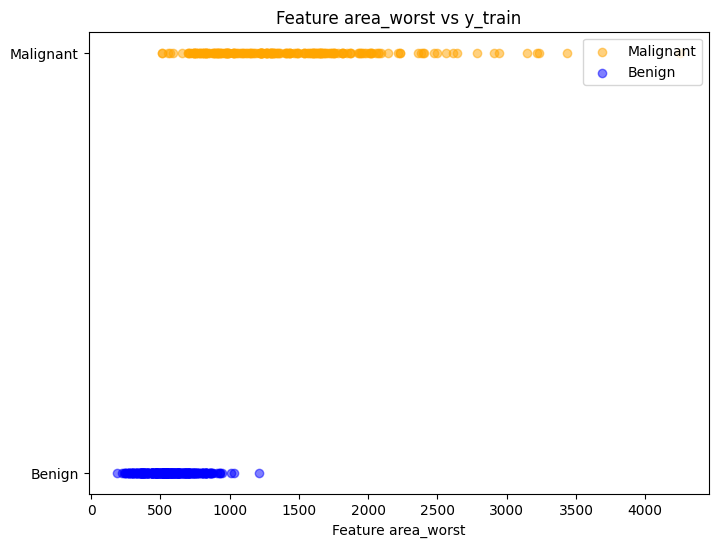

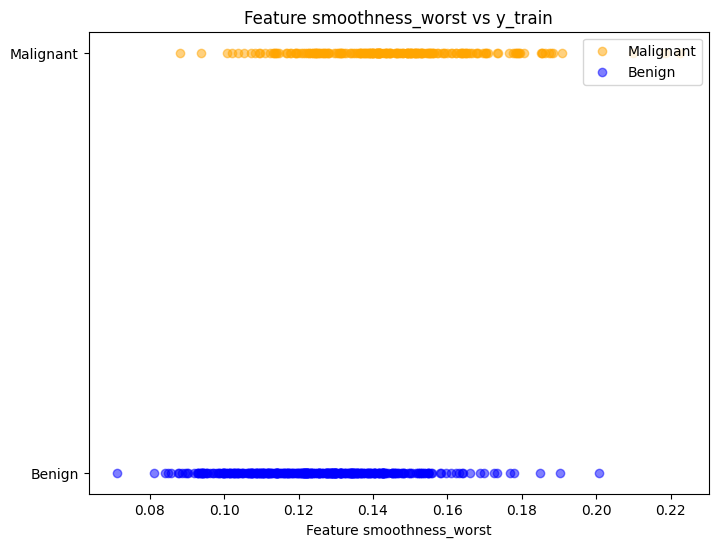

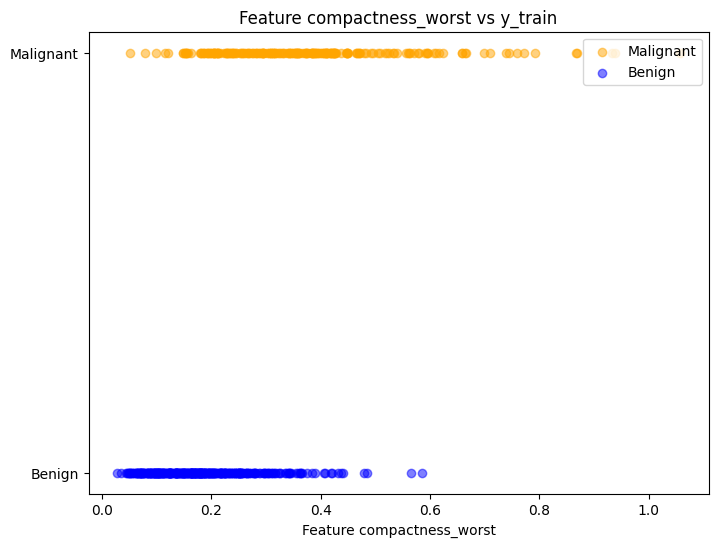

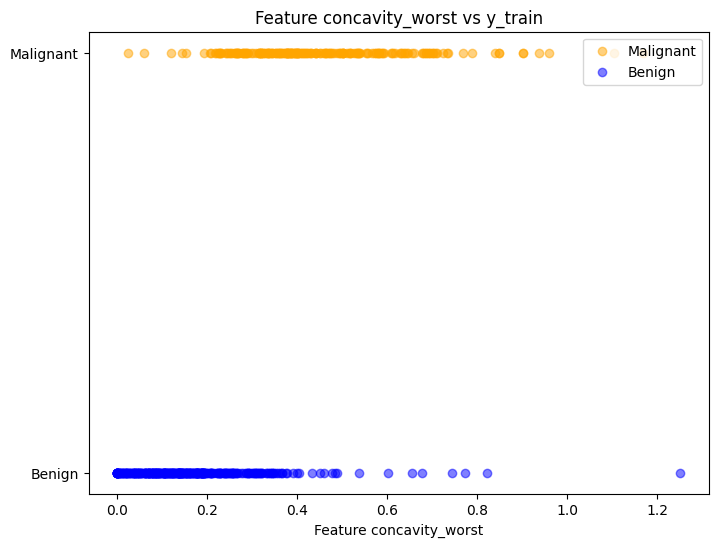

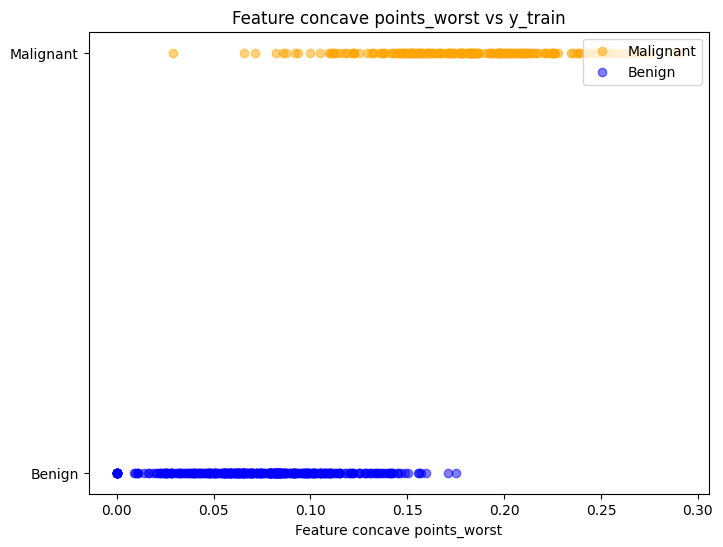

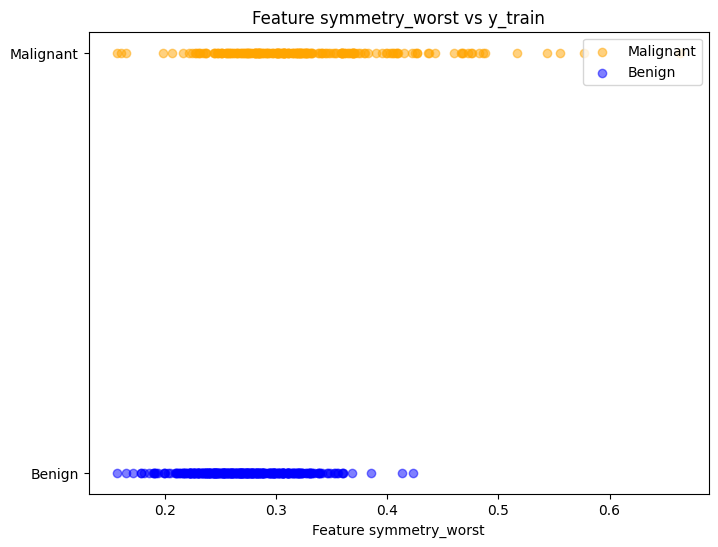

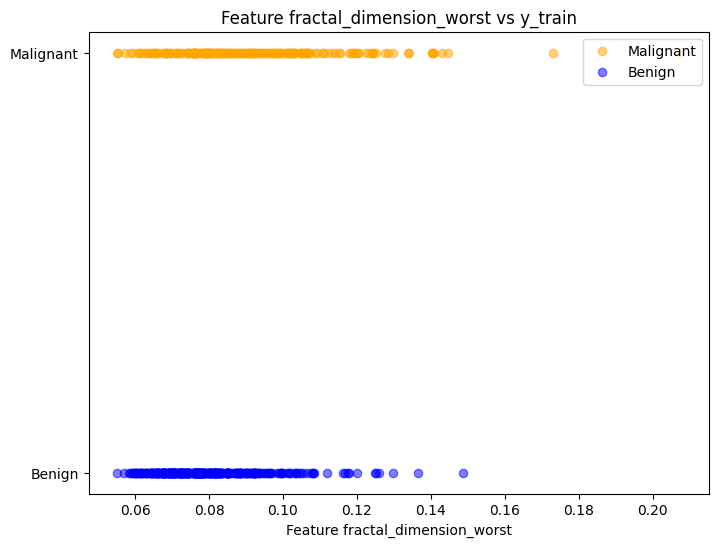

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Separate data for malignant and benign cases
malignant_data = x_train[y_train == 1]
benign_data = x_train[y_train == 0]

# Plotting for each feature against y_train
for feature_index in range(x_train.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(malignant_data[:, feature_index], np.ones_like(malignant_data[:, feature_index]), color='orange', label='Malignant', alpha=0.5)
    plt.scatter(benign_data[:, feature_index], np.zeros_like(benign_data[:, feature_index]), color='blue', label='Benign', alpha=0.5)
    
    plt.title(f'Feature {x_features[feature_index]} vs y_train')
    plt.xlabel(f'Feature {x_features[feature_index]}')
    plt.yticks([0, 1], ['Benign', 'Malignant'])
    plt.legend(loc = "upper right")
    plt.show()


#### Sigmoid function

In [14]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

#### Compute Cost Function

In [19]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        z = np.dot(x[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1 - f_wb)
    cost = cost/m
    return cost

#### Compute Gradient Function

In [22]:
def compute_gradient(x, y, w, b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = sigmoid(np.dot(x[i],w) + b)
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err*x[i][j]
        dj_db += err
    
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

#### Gradient Descent

In [23]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m,n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
    return w,b

In [26]:
mapped_x = map_feature(x_train[:, 0], x_train[:, 1])
mapped_x.shape

(569, 27)

In [27]:
print("x_train[0]:", x_train[0])
print("mapped x_train[0]:", mapped_x[0])

x_train[0]: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
mapped x_train[0]: [1.79900000e+01 1.03800000e+01 3.23640100e+02 1.86736200e+02
 1.07744400e+02 5.82228540e+03 3.35938424e+03 1.93832176e+03
 1.11838687e+03 1.04742914e+05 6.04353224e+04 3.48704084e+04
 2.01197798e+04 1.16088557e+04 1.88432503e+06 1.08723145e+06
 6.27318647e+05 3.61954839e+05 2.08843315e+05 1.20499922e+05
 3.38990073e+07 1.95592938e+07 1.12854625e+07 6.51156756e+06
 3.75709123e+06 2.16779361e+06 1.25078920e+06]
